# Forest Fires Prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

import seaborn as sns
plt.style.use('seaborn')

## Input Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('D:/Indonesia.AI/Pekan 3/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
print('Total data:', data.shape[0])
print('Total features:', data.shape[1])

Total data: 517
Total features: 13


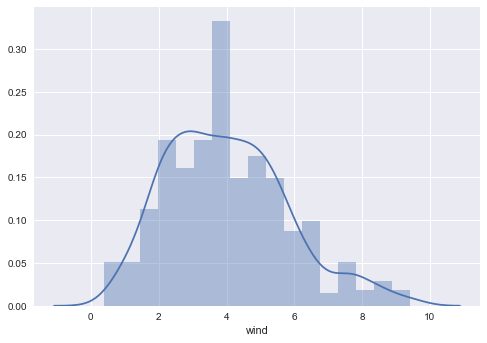

In [7]:
sns.distplot(data['wind'])

C:\Users\ASUS PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


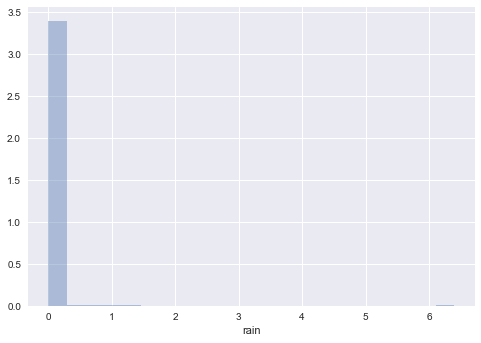

In [8]:
sns.distplot(data['rain'])

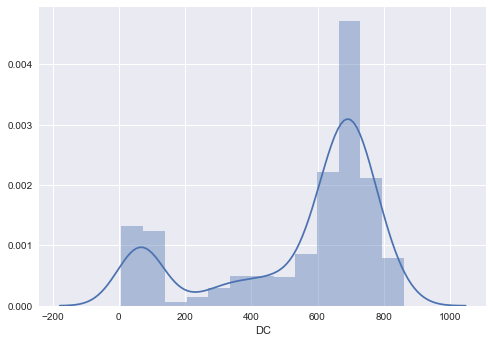

In [9]:
sns.distplot(data['DC'])

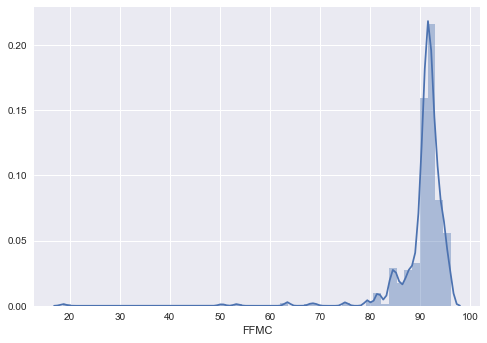

In [10]:
sns.distplot(data['FFMC'])

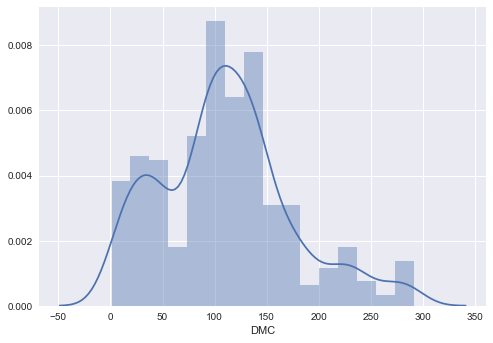

In [11]:
sns.distplot(data['DMC'])

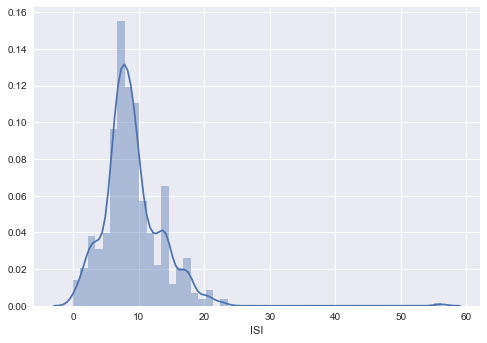

In [12]:
sns.distplot(data['ISI'])

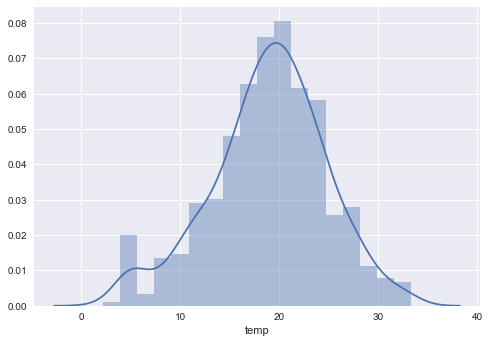

In [13]:
sns.distplot(data['temp'])

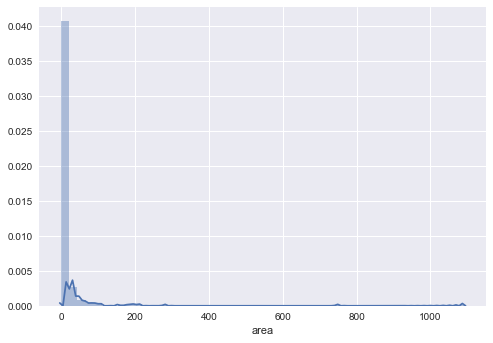

In [14]:
sns.distplot(data['area'])

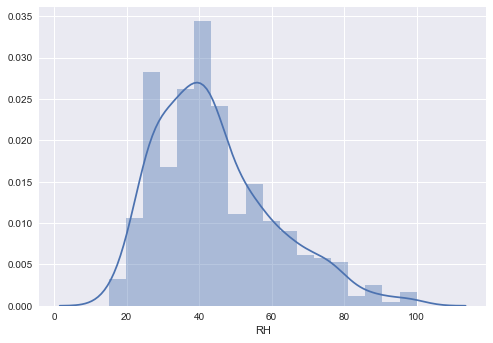

In [15]:
sns.distplot(data['RH'])

In [16]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Changing Data Category: Object to Integer

In [17]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun


In [18]:
obj_data[obj_data.isnull().any(axis=1)]

,month,day


In [19]:
obj_data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [20]:
obj_data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [21]:
print(obj_data.isnull().sum())

month    0
day      0
dtype: int64


In [22]:
cleanup={'month':{"jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
          'day':{'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7}}

In [23]:
obj_data = obj_data.replace(cleanup)
obj_data.head()

,month,day
0,3,6
1,10,3
2,10,7
3,3,6
4,3,1


In [24]:
obj_data.dtypes

month    int64
day      int64
dtype: object

In [25]:
data=data.replace(cleanup)

In [26]:
data['area'] = np.log(data['area']+1)
data['FFMC'] = np.log(data['FFMC'] + 1)
data['ISI'] = np.log(data['ISI'] + 1)
data['rain'] = np.log(data['rain'] + 1)

In [27]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0.000000,0.0
1,7,4,10,3,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0.000000,0.0
2,7,4,10,7,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0.000000,0.0
3,8,6,3,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,0.182322,0.0
4,8,6,3,1,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0.000000,0.0


### Split Dataset

In [28]:
X = data.drop('area', axis=1)
y = data['area']

In [29]:
# Scaling data
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit_transform(X)
std

array([[ 1.00831277,  0.56986043, -1.96844301, ...,  0.41172435,
         1.49861442, -0.09726116],
       [ 1.00831277, -0.24400101,  1.1101202 , ..., -0.69245628,
        -1.74175564, -0.09726116],
       [ 1.00831277, -0.24400101,  1.1101202 , ..., -0.69245628,
        -1.51828184, -0.09726116],
       ...,
       [ 1.00831277, -0.24400101,  0.23053071, ...,  1.57724834,
         1.49861442, -0.09726116],
       [-1.58736044, -0.24400101,  0.23053071, ..., -0.14036597,
        -0.00983371, -0.09726116],
       [ 0.57570057, -1.05786246,  1.54991494, ..., -0.81514302,
         0.26950853, -0.09726116]])

In [30]:
# Split data for training & testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std, y, test_size=0.2, random_state=42)

## Modelling and Trial

In [31]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

### Determing optimum activational function, number of epochs, and number of layers

In [32]:
# define model
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1], kernel_initializer='uniform'))
            model.add(Activation(activation))
            #model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            #model.add(Dropout(0.3))
            
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model
    
model = KerasRegressor(build_fn=create_model, verbose=0)

In [33]:
layers = [(27,), (27, 16), (27,16,8), (32,16,8), (64,16,16), (64,32,16,8)]
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, epochs=[100])
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_, grid_result.best_params_]

[-1.0954699009920623, {'activation': 'relu', 'epochs': 100, 'layers': (27,)}]

### Determining optimum epochs

In [35]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, epochs):
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['mean_absolute_error'], label='train')
    plt.plot(history.history['val_mean_absolute_error'], label='test')
    plt.title('epoch='+str(epochs))
    plt.ylabel('Mean Absolute Error')
    plt.legend()

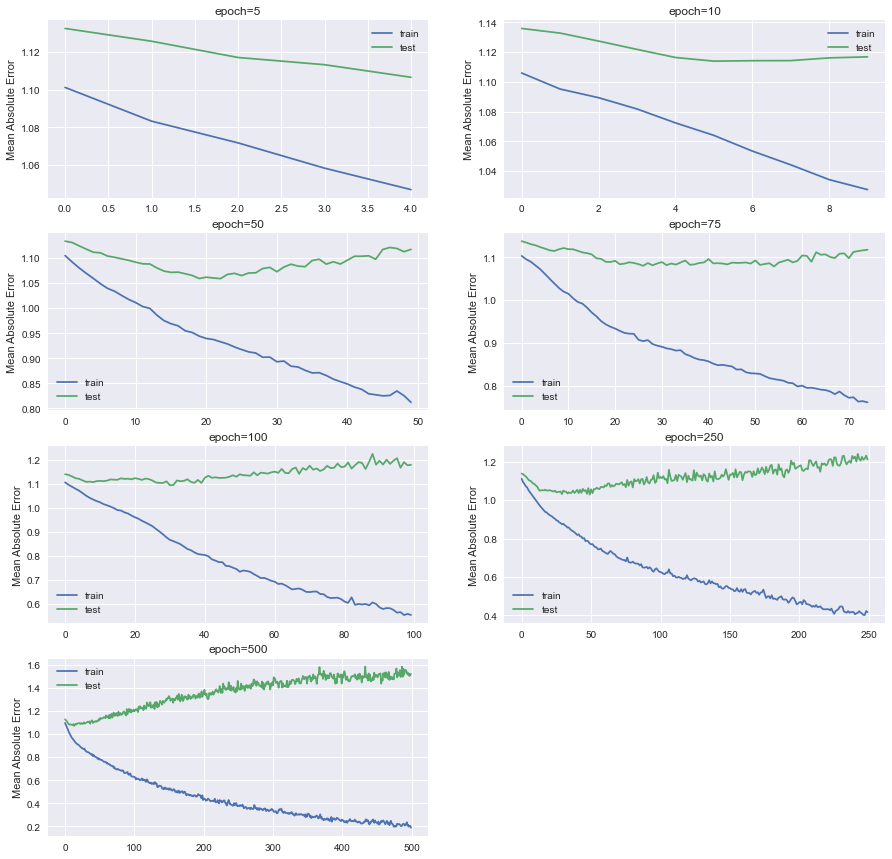

In [36]:
# create learning curves for different Epochs
epochs = [5, 10, 50, 75, 100, 250, 500]

plt.figure(figsize=(15, 15))
for i in range(len(epochs)):
  
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a Epochs
    fit_model(X_train, y_train, X_test, y_test, epochs=epochs[i])
    
# show learning curves
plt.show()

### Determining optimum batch size

In [37]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, batchs):
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, batch_size=batchs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['mean_absolute_error'], label='train')
    plt.plot(history.history['val_mean_absolute_error'], label='test')
    plt.title('batch_size='+str(batchs))
    plt.ylabel('Mean Absolute Error')
    plt.legend()

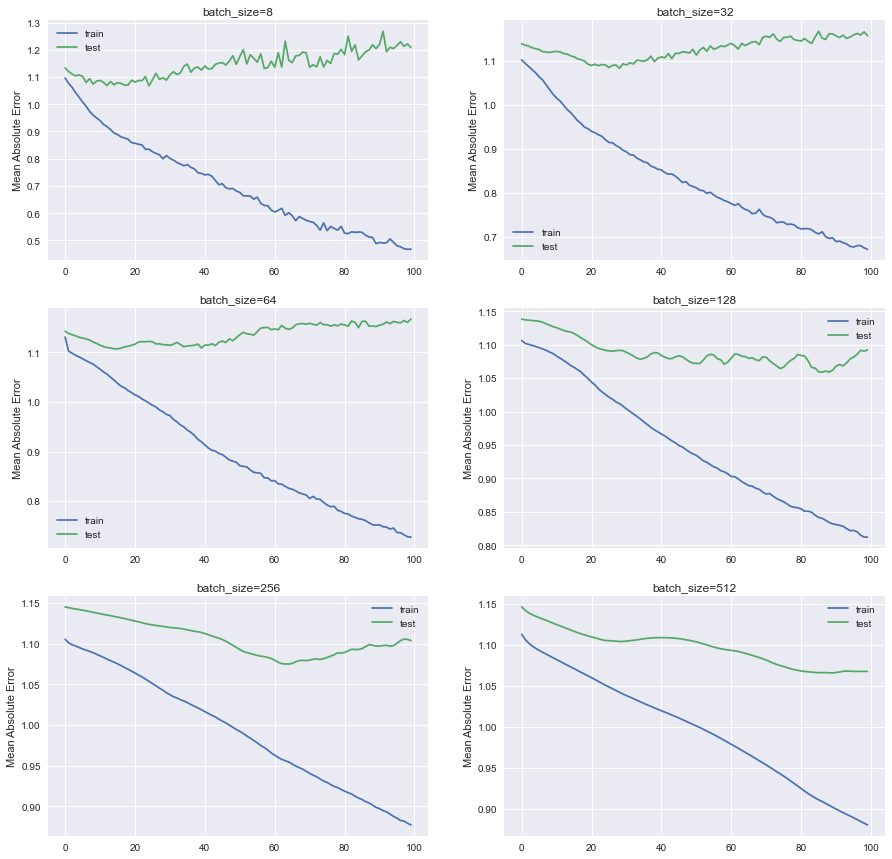

In [38]:
# create learning curves for different batch sizes
batchs = [8, 32, 64, 128, 256, 512]

plt.figure(figsize=(15, 15))
for i in range(len(batchs)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batchs
    fit_model(X_train, y_train, X_test, y_test, batchs=batchs[i])
    
# show learning curves
plt.show()

### Determining optimum learning rate

In [39]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# Define Gridsearch Parameter
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error' )
grid_result = grid.fit(X_train, y_train)

# Best Score an Parameter
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1.069802 using {'optimizer': 'Adamax'}


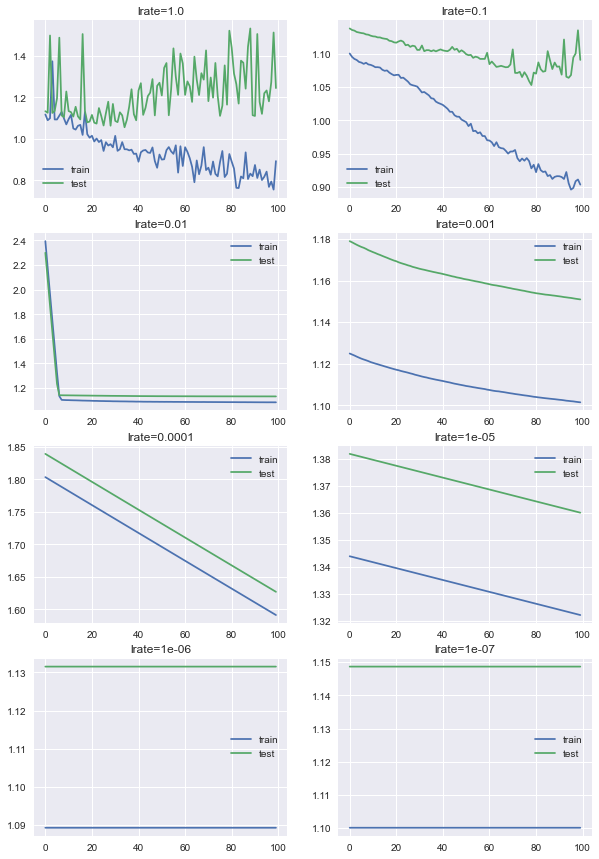

In [40]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, lrate):
    
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(1))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='mae', optimizer=opt, metrics=['mae'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, batch_size=64, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['mae'], label='train')
    plt.plot(history.history['val_mae'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()
  
# Plot Learning rate trial
plt.figure(figsize=(10, 15))
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]    
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

### Determining optimum momentum

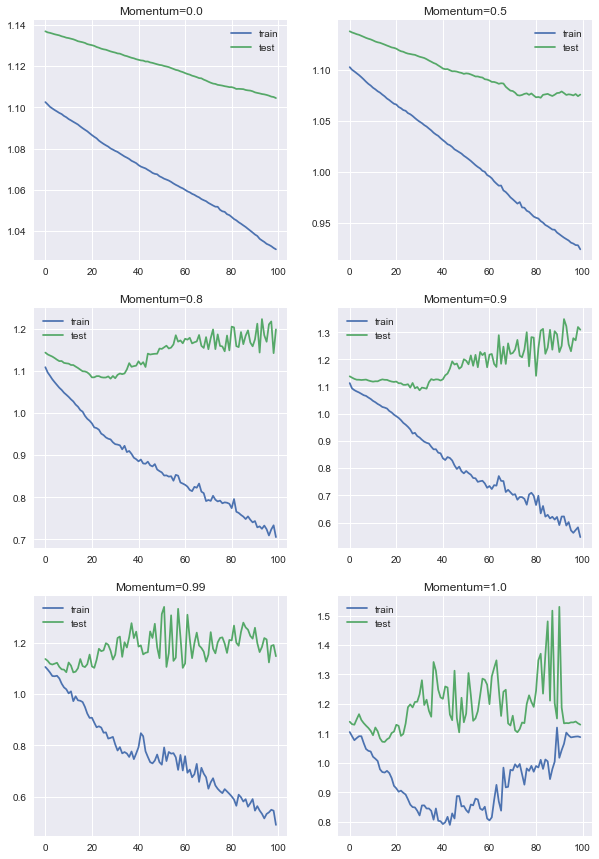

In [41]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, momentum):
    
    # define model
    model = Sequential()
    model.add(Dense(32, input_dim=12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='mae', optimizer=opt, metrics=['mae'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=100, batch_size=64, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['mae'], label='train')
    plt.plot(history.history['val_mae'], label='test')
    plt.title('Momentum='+str(momentum))
    plt.legend()

    
    
# Plot Learning rate trial
plt.figure(figsize=(10, 15))
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0   
for i in range(len(momentums)):
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

### Training using optimum hyperparameters

In [42]:
# define model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
    
# compile model
opt = SGD(learning_rate=0.1, momentum=0.99)
model.compile(loss='mae', optimizer='adam', metrics=['mae','mse'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=8, verbose=1)

Epoch 1/250
52/52 [==============================] - 3s 14ms/step - loss: 1.1216 - mae: 1.1216 - mse: 2.9855 - val_loss: 1.1327 - val_mae: 1.1327 - val_mse: 3.2926
Epoch 2/250
52/52 [==============================] - 0s 5ms/step - loss: 1.1226 - mae: 1.1226 - mse: 3.1174 - val_loss: 1.1215 - val_mae: 1.1215 - val_mse: 3.1174
Epoch 3/250
52/52 [==============================] - 0s 5ms/step - loss: 1.1344 - mae: 1.1344 - mse: 2.9258 - val_loss: 1.1112 - val_mae: 1.1112 - val_mse: 2.8945
Epoch 4/250
52/52 [==============================] - 0s 5ms/step - loss: 1.0382 - mae: 1.0382 - mse: 2.2987 - val_loss: 1.1040 - val_mae: 1.1040 - val_mse: 2.7148
Epoch 5/250
52/52 [==============================] - 0s 5ms/step - loss: 1.0284 - mae: 1.0284 - mse: 2.3823 - val_loss: 1.1009 - val_mae: 1.1009 - val_mse: 2.6241
Epoch 6/250
52/52 [==============================] - 0s 7ms/step - loss: 1.0419 - mae: 1.0419 - mse: 2.3305 - val_loss: 1.1020 - val_mae: 1.1020 - val_mse: 2.5646
Epoch 7/250
52/52 [==

52/52 [==============================] - 0s 5ms/step - loss: 0.4654 - mae: 0.4654 - mse: 0.8304 - val_loss: 1.3124 - val_mae: 1.3124 - val_mse: 3.3259
Epoch 101/250
52/52 [==============================] - 0s 5ms/step - loss: 0.5593 - mae: 0.5593 - mse: 1.0325 - val_loss: 1.2667 - val_mae: 1.2667 - val_mse: 3.2096
Epoch 102/250
52/52 [==============================] - 0s 5ms/step - loss: 0.5398 - mae: 0.5398 - mse: 0.9386 - val_loss: 1.2923 - val_mae: 1.2923 - val_mse: 3.3630
Epoch 103/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4993 - mae: 0.4993 - mse: 0.8636 - val_loss: 1.2991 - val_mae: 1.2991 - val_mse: 3.4358
Epoch 104/250
52/52 [==============================] - 0s 5ms/step - loss: 0.5378 - mae: 0.5378 - mse: 0.9695 - val_loss: 1.2868 - val_mae: 1.2868 - val_mse: 3.2140
Epoch 105/250
52/52 [==============================] - 0s 4ms/step - loss: 0.5082 - mae: 0.5082 - mse: 0.9376 - val_loss: 1.2960 - val_mae: 1.2960 - val_mse: 3.2516
Epoch 106/250
52/52 [===

Epoch 150/250
52/52 [==============================] - 0s 5ms/step - loss: 0.5050 - mae: 0.5050 - mse: 0.9219 - val_loss: 1.3205 - val_mae: 1.3205 - val_mse: 3.4295
Epoch 151/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4452 - mae: 0.4452 - mse: 0.7013 - val_loss: 1.3279 - val_mae: 1.3279 - val_mse: 3.4546
Epoch 152/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4832 - mae: 0.4832 - mse: 0.9644 - val_loss: 1.3740 - val_mae: 1.3740 - val_mse: 3.4693
Epoch 153/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4735 - mae: 0.4735 - mse: 0.7915 - val_loss: 1.3741 - val_mae: 1.3741 - val_mse: 3.5398
Epoch 154/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4465 - mae: 0.4465 - mse: 0.6701 - val_loss: 1.3139 - val_mae: 1.3139 - val_mse: 3.3118
Epoch 155/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4130 - mae: 0.4130 - mse: 0.7377 - val_loss: 1.3307 - val_mae: 1.3307 - val_mse: 3.3831
Epoch 156/

Epoch 200/250
52/52 [==============================] - 0s 5ms/step - loss: 0.5063 - mae: 0.5063 - mse: 0.9862 - val_loss: 1.3446 - val_mae: 1.3446 - val_mse: 3.3990
Epoch 201/250
52/52 [==============================] - 0s 5ms/step - loss: 0.3677 - mae: 0.3677 - mse: 0.6112 - val_loss: 1.3498 - val_mae: 1.3498 - val_mse: 3.4548
Epoch 202/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4026 - mae: 0.4026 - mse: 0.7503 - val_loss: 1.3764 - val_mae: 1.3764 - val_mse: 3.5313
Epoch 203/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4304 - mae: 0.4304 - mse: 0.7610 - val_loss: 1.3614 - val_mae: 1.3614 - val_mse: 3.4916
Epoch 204/250
52/52 [==============================] - 0s 4ms/step - loss: 0.4083 - mae: 0.4083 - mse: 0.6697 - val_loss: 1.3766 - val_mae: 1.3766 - val_mse: 3.5093
Epoch 205/250
52/52 [==============================] - 0s 5ms/step - loss: 0.4227 - mae: 0.4227 - mse: 0.6839 - val_loss: 1.3677 - val_mae: 1.3677 - val_mse: 3.4794
Epoch 206/

In [43]:
# evaluate the model
_, train_mae, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, valid_mae, valid_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train MAE: %.2f, Valid MAE: %.2f' % (train_mae, valid_mae))
print('Train MSE: %.2f, Valid MSE: %.2f' % (train_mse, valid_mse))

Train MAE: 0.37, Valid MAE: 1.36
Train MSE: 0.62, Valid MSE: 3.53
